# Data Exploration

In [39]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Read Data for All Earthquakes
All data from the [U.S. Geological Service Website](http://earthquake.usgs.gov/earthquakes/search/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
years = ['1985-1989', '1990-1994', '1995-1999', '2000', '2001', '2002', 
         '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
         '2011', '2012', '2013', '2014', '2015']

quakes = pd.DataFrame()
for year in years:
    path ='data/quakes%s.csv' % year
    frame = pd.read_csv(path)
    quakes = quakes.append(frame, ignore_index=True)
    
# {'shape': quakes.shape, 'columns': list(quakes.columns)}

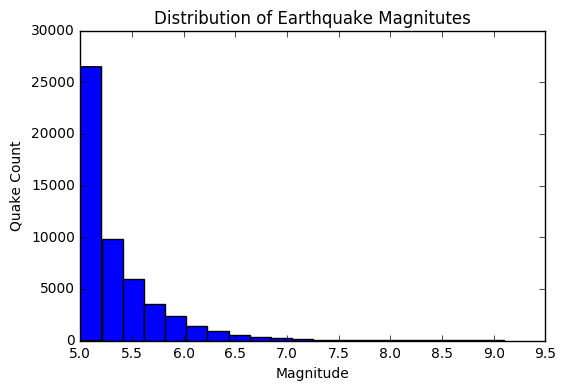

In [4]:
plt.hist(quakes['mag'], bins = 20)
plt.title('Distribution of Earthquake Magnitutes')
plt.xlabel('Magnitude')
plt.ylabel('Quake Count')
plt.show()

## Plot Earthquakes Worldwide
Example Reference Code from: [FlowingData: Mapping a century of earthquakes (sent by Fons-Rosen)](http://flowingdata.com/2014/04/15/mapping-a-century-of-earthquakes/)

In [5]:
# select only quakes with magnitude higher than 5.5 to pass to R
r_quakes = quakes[(abs(quakes['mag']) > 5.5)]

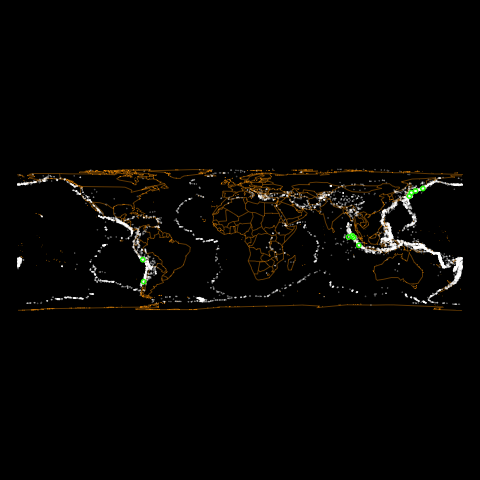

In [6]:
%%R -i r_quakes
quakes = r_quakes
library(maps)
library(mapproj)

# Draw map
par(mar=c(0,0,0,0))
map("world", col="orange", bg="#000000", fill=FALSE, interior=TRUE, lwd=0.5, projection="cylequalarea", par=0, wrap=TRUE)
 
# Add points
ptsproj <- mapproject(quakes$longitude, quakes$latitude)
points(ptsproj, pch=20, cex=0.15, col="#ffffff40")
 
# Circle the highest magnitude quakes
quakes.o <- quakes[order(quakes$mag, decreasing=TRUE),]
majorpts <- mapproject(quakes.o$longitude[1:10], quakes.o$latitude[1:10])
symbols(majorpts, circles=rep(0.03, 10), add=TRUE, inches=FALSE, fg="green", lwd=2)

## Read Data for All Earthquakes
All data from the [U.S. National Centers for Environmental Information Volcano Database](https://ngdc.noaa.gov/nndc/servlet/ShowDatasets?dataset=102557&search_look=50&display_look=50)

In [36]:
eruptions = pd.read_csv('data/significant_eruptions.tsv', sep = '\t')
# {'shape': eruptions.shape, 'columns': list(eruptions.columns)}

## Plot Volcanic Eruptions with Economic Impact Worldwide
Example Reference Code from: [FlowingData: Mapping a century of earthquakes (sent by Fons-Rosen)](http://flowingdata.com/2014/04/15/mapping-a-century-of-earthquakes/)

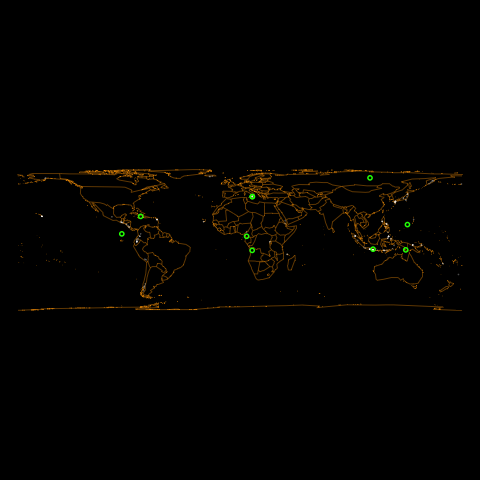

In [35]:
%%R -i eruptions

library(maps)
library(mapproj)

# Draw map
par(mar=c(0,0,0,0))
map("world", col="orange", bg="#000000", fill=FALSE, interior=TRUE, lwd=0.5, projection="cylequalarea", par=0, wrap=TRUE)
 
# Add points
ptsproj <- mapproject(eruptions$Longitude, eruptions$Latitude)
points(ptsproj, pch=20, cex=0.15, col="#ffffff40")
 
# Circle the highest economic damage eruptions
eruptions.o <- eruptions[order(eruptions$TOTAL_DAMAGE_MILLIONS_DOLLARS, decreasing=TRUE),]
majorpts <- mapproject(eruptions$Longitude[1:10], eruptions.o$Latitude[1:10])
symbols(majorpts, circles=rep(0.03, 10), add=TRUE, inches=FALSE, fg="green", lwd=2)

# Thoughts
## Convolutional Neural Network for Spatial Preditions
Use a Convolutional Neural Network to learn spatial dependencies in the data. This would allow to predict economic impact (represented by luminosity and light patterns) as a function of the natural disasters data (earthquakes, eruptions).